# Report tecnico progetto seminario ASMLP

## Analisi
il presente progetto contiene le seguenti analisi:
### 1. Analisi descrittiva del dataset:
- a. Identificazione della tipologia delle features;
- b. Rappresentazione numerica (media, mediana, standard deviation, quartili, moda);
- c. Rappresentazione grafica.

### 2. Analisi di classificazione:
- classificazione.

Per prima cosa è stato importato il dataset tramite la libreria Pandas

In [1]:
import pandas as pd

df= pd.read_csv('datasets/advertising.csv')

## a. Identificazione della tipologia delle features;

In [2]:
df.columns= ['Daily_Time_Spent_on_Site', 'Age', 'Area_Income',
    'Daily_Internet_Usage', 'Ad_Topic_Line', 'City', 'Male', 'Country',
    'Timestamp', 'Clicked_on_Ad']

print(df.info())

#oppure

print("Tipologia delle features: \n")
print("Daily_Time_Spent_on_Site: ", df.Daily_Time_Spent_on_Site.dtype)
print("Age: ",df.Age.dtype)
print("Area_Income: ", df.Area_Income.dtype)
print("Daily_Internet_Usage: ", df.Daily_Internet_Usage.dtype)
print("Ad_Topic_Line: ",df.Ad_Topic_Line.dtype)
print("City: ", df.City.dtype)
print("Male: ", df.Male.dtype)
print("Country: ",df.Country.dtype)
print("Timestamp: ", df.Timestamp.dtype)
print("Clicked_on_Ad: ", df.Clicked_on_Ad.dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily_Time_Spent_on_Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area_Income               1000 non-null   float64
 3   Daily_Internet_Usage      1000 non-null   float64
 4   Ad_Topic_Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked_on_Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
None
Tipologia delle features: 

Daily_Time_Spent_on_Site:  float64
Age:  int64
Area_Income:  float64
Daily_Internet_Usage:  float64
Ad_Topic_Line:  object
City:  object
M

Si è individuata la tipologia delle variabili e si è osservato che non sono presenti valori mancanti.

## b. Rappresentazione numerica (media, mediana, standard deviation, quartili, moda)

In [4]:
for key, value in df.iteritems():
    if df[key].dtype== 'int64' or df[key].dtype== 'float64' :
        print("\t", df[key].name)
        print("median \t\t", df[key].median())
        print("mode \t\t", df[key].mode().unique())
        print(df[key].describe(), "\n")

	 Daily_Time_Spent_on_Site
median 		 68.215
mode 		 [62.26 75.55 77.05 78.76 84.53]
count    1000.000000
mean       65.000200
std        15.853615
min        32.600000
25%        51.360000
50%        68.215000
75%        78.547500
max        91.430000
Name: Daily_Time_Spent_on_Site, dtype: float64 

	 Age
median 		 35.0
mode 		 [31]
count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64 

	 Area_Income
median 		 57012.3
mode 		 [13996.5  14548.06 14775.5  15598.29 15879.1  17709.98 18368.57 18819.34
 19345.36 19991.72 20592.99 20856.54 21644.91 21773.22 22205.74 22456.04
 22473.08 23410.75 23821.72 23936.86 23942.61 23975.35 24030.06 24078.93
 24316.61 24593.33 24852.9  25371.52 25408.21 25583.29 25598.75 25603.93
 25682.65 25686.34 25739.09 25767.16 26023.99 26130.93 27073.27 27086.4
 27241.11 27262.51 27508.41 27964.6  28019.09 28028.74 28186.65 2

Per ciascuna variabile oltre alle informazioni ottenute dalla funzione "describe()" si sono aggiunte le informazioni su
mediana e moda.

## c. Rappresentazione grafica (se possibile)

Male           Female  Male
Clicked_on_Ad              
click             269   231
not click         250   250


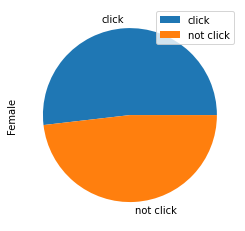

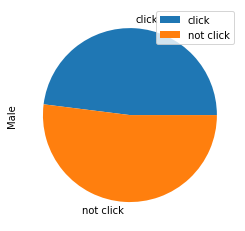

In [3]:
import matplotlib.pyplot as plt


df['Male']= df['Male'].map({1: 'Male', 0:'Female'})
df['Clicked_on_Ad']= df['Clicked_on_Ad'].map({1: 'click', 0:'not click'})
contincency_table= pd.crosstab(df.Clicked_on_Ad, df.Male)
print(contincency_table)

contincency_table.plot.pie(y='Female')
plt.show()
contincency_table.plot.pie(y='Male')
plt.show()

#riutiliziamo la funzione map per ripristinare i valori di partenza perchè sarà utile nella fase di previsione.
df['Male']= df['Male'].map({'Male': 1, 'Female':0})
df['Clicked_on_Ad']= df['Clicked_on_Ad'].map({'click': 1, 'not click':0})

Si può notare che non c'è una grossa differenza tra uomo e donna per i click sulla pubblicità

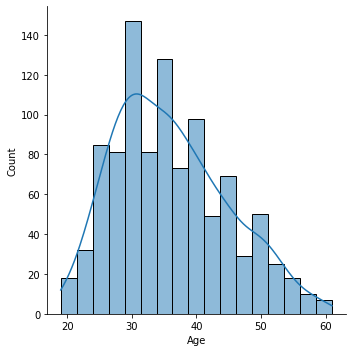

In [4]:
import seaborn as sns


sns.displot(df['Age'], kde='True')
plt.show()

Dal grafico possiamo assumere che la variabile 'Age' ha una distribuzione normale

In [ ]:
sns.displot(x='Age' , y='Daily_Time_Spent_on_Site' ,data=df, kind='kde', rug=True, )
plt.show()

il grafico mostra che gli utenti più giovani (25-40 anni) sono quelli che  spendono più tempo sul sito

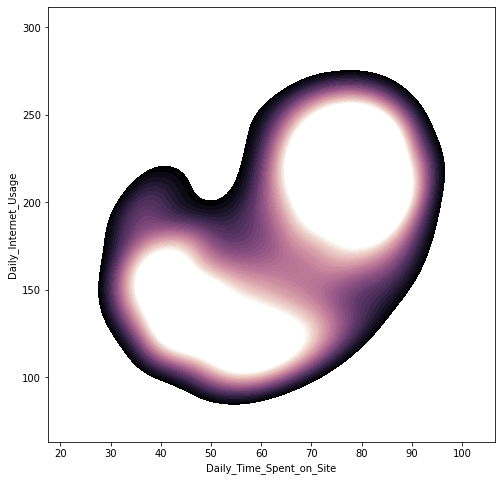

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.cubehelix_palette(as_cmap=True, start=0, dark=0, light=3, reverse=True)
sns.kdeplot(df["Daily_Time_Spent_on_Site"], y=df["Daily_Internet_Usage"],
                cmap=cmap, n_levels=100, shade=True);
plt.show()

Dal grafico è possibile osservare la relazione tra la variabile "Daily_Time_Spent_on_Site" e "Daily_Internet_Usage".
Le 2 aree più luminose sono i punti di maggiore densità in cui si concentrano il maggior numero di le osservazioni.

## Preprocessing


In [6]:
object_variables = ['Ad_Topic_Line', 'City', 'Country']
print(df[object_variables].describe(include=['O']))


                             Ad_Topic_Line       City Country
count                                 1000       1000    1000
unique                                1000        969     237
top     Cloned 5thgeneration orchestration  Lisamouth  France
freq                                     1          3       9


Come già osservato in precedenza, le variabili "City" e "Ad_Topic_Line"
contengono troppe osservazioni uniche (rispettivamente 969 e 1000).
Poichè in genere è molto dificile fare previsioni senza che esista
un data patern queste variabile saranno escluse. La variabile Country ha
un unico elemento ripetuto 9 volte (France). Esploriamo meglio la variabile.

In [7]:
print(df["Country"].value_counts()[:15])

France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Senegal           8
Liberia           8
Australia         8
South Africa      8
Micronesia        8
Cyprus            8
Afghanistan       8
Taiwan            7
Cambodia          7
Luxembourg        7
Name: Country, dtype: int64


Nel dataset sono presenti 237 countries ma non è presente un Country dominante
Tanti elementi unici non consentiranno a un modello di machine learning di stabilire
relazioni. Per questo motivo anche Country verrà esclusa.

In [8]:
df = df.drop(['Ad_Topic_Line', 'City', 'Country'], axis=1)

Escludiamo le variabili.

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day of month'] = df['Timestamp'].dt.day
df['Day of week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

df.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad,Month,Day of month,Day of week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


Si è proceduto a dividere la variabile "timestamp" in:
"Month", "Day of manth", "Day of week", "Hour". In questo modo
si possono agevolmente elaborare le informazioni sul giorno del
mese, della settimana e l'ora in cui la pubblicità è stata cliccata.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['Daily_Time_Spent_on_Site', 'Age', 'Area_Income', 'Daily_Internet_Usage',
              'Male', 'Month', 'Day of month', 'Day of week']]
y = df['Clicked_on_Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

il dataset è stato diviso in training e test set. Tutte le variabili, a eccezione di
"Clicked_on_Ad"(variabile da predire-->y) saranno le variabili input (x). Tramite la funzione "StandardScaler()"
si sono standardizzate le features.

## Logistic Regression model
il primo modello importato sarà un Logistic Regression model.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model1 = LogisticRegression()
model1.fit(X_train_std, y_train)
predictions_LR = model1.predict(X_test_std)

print('\nLogistic regression accuracy %.5f:'% accuracy_score(predictions_LR, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_LR, y_test))
print('Misclassified samples: %d' % (y_test != predictions_LR).sum())


Logistic regression accuracy 0.96970:

Confusion Matrix:
[[174   5]
 [  5 146]]
Misclassified samples: 10


Il modello ha un accuratezza di 0.96970 . Dalla matrice di confusione il modello risulta aver calssificato erroneamente 10 volte.

## DecisionTreeClassifier

In [12]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train_std, y_train)
predictions_DT = model2.predict(X_test_std)

print('\nDecision Tree accuracy: %.5f'% accuracy_score(predictions_DT, y_test))
print('\nConfusion Matrix:')
print(confusion_matrix(predictions_DT, y_test))
print('Misclassified samples: %d' % (y_test != predictions_DT).sum())


Decision Tree accuracy: 0.92424

Confusion Matrix:
[[163   9]
 [ 16 142]]
Misclassified samples: 25


Il modello ha un accuratezza di 0.92424 . Dalla matrice di confusione il modello risulta aver calssificato erroneamente 25 volte.

## Perceptron

In [13]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
print(y_test.shape)
y_pred = ppn.predict(X_test_std)

print('Perceptron Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(confusion_matrix(y_pred, y_test))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

(330,)
Perceptron Accuracy: 0.96667
[[174   6]
 [  5 145]]
Misclassified samples: 11


Il modello ha un accuratezza di 0.96667 . Dalla matrice di confusione il modello risulta aver calssificato erroneamente 11 volte.

## Conclusioni
Sono state utilizzati 3 differenti modelli per la classificazione:
- il modello di regressione logistica;
- il decision tree model
- il modello utilizzando l'algoritmo Perceptron

Il miglior modello di classificazione su un campione di 330 osservazioni è risultato
essere il modello di regressione logistica (10 malclassificati). Il secondo miglior classificatore è stato il modello che utilizza l'algoritmo Perceptron (11 malclassificati) e infine il modello che ha avuto performance peggiori è stato il decision tree model (25 malclassificati).

